Testpoint 1 (Normal Alg): Pikachu
Testpoint 1 (Fancy Alg): Pikachu
Testpoint 2 (Normal Alg): Pikachu
Testpoint 2 (Fancy Alg): Pikachu
Testpoint 3 (Normal Alg): Pikachu
Testpoint 3 (Fancy Alg): Pikachu
Testpoint 4 (Normal Alg): Pichu
Testpoint 4 (Fancy Alg): Pichu
User input (Normal Alg): Pichu
User input (Fancy Alg): Pichu


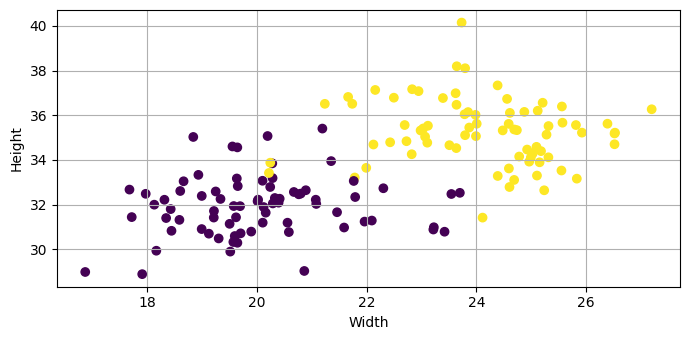

In [27]:
import re
import math
import matplotlib.pyplot as plt

# Open file, read all lines and return
def OpenFileReadLines(FileName):
    with open(FileName) as FileContents:
        return FileContents.readlines()
    
# Function/method for calculating distance between points.
# Takes two arguments, in the form of two lists. (e.g [x1 - x2], [y1 - y2])
def CalculatePointDistance(Point1, Point2):
    # Equation for euclidean distance
    Distance = math.sqrt((Point1[0]-Point2[0])**2 + (Point1[1]-Point2[1])**2)
    return Distance


# Function/method for discriminating between pokemon.
# This is deceptively complex (yet simple) function/method, which finds
# the pokemon type by calculating all the distances between the unknown pokemon (from testpoints.txt)
# and the known ones, dumping them all into one list (of lists), than running .sort() in order to
# sort the list based on the distance between the points, thereby splitting out a nice and tidy list
# where the first index is you're answere.
# We'll get to the "FancyAlg" later, as it's simple.
def CalculatePokemonType(Width, Height, FancyAlg):

    # List for storing the distances and labels
    DistancesAndLabels = []

    # loop through all three lists and do stuff with each datapoint
    for (WList, HList, LList) in zip(PokemonWidth, PokemonHeight, PokemonLabel):

        # Call CalculatePointDistance() and pass in the two lists containing the two points
        # we'd like the distance between. The []'s around the variables being passed as arguments are
        # for creating the lists on the fly.
        Distance = CalculatePointDistance([Width, Height], [WList, HList])

        # Add the distance (between unknown and known pokemon) as well as known pokemon label
        # (from training dataset) to a list. This forms a list of lists, of wich the first index of
        # the inner list is the distance between the known and unknown pokemon, and the second index
        # the label for the known pokemon.
        DistancesAndLabels.append([Distance, LList])

    # Where the magic happens (for the normal alg type) (refer to above comments).
    DistancesAndLabels.sort()
    NearstPokemonType = DistancesAndLabels[0][1]

    # The first index is (most likely) our pokemon type. Python magic!
    if NearstPokemonType == 0:
        NearstPokemonType = "Pichu"
    else:
        NearstPokemonType = "Pikachu"

    # Check if Fancy algorithm is wanted. "not" means "if not true" in this case.
    if not FancyAlg:
        return NearstPokemonType

    Vote = 0
    # For the fancier (nearest 10 point voting) algorithm, we simply take the first 10 indices of
    # the DistancesAndLabels list, than increment/decrement the Vote variable depending on the label (e.g which pokemon type)
    for Label in DistancesAndLabels[:10]:
        if Label[1] == 0:
            Vote -= 1
        else:
            Vote += 1

    # If the number in Vote is negative, than it's a Pichu, and negative a "Pikachu".
    # If we fail to reach a consensus (e.g Vote = 0) on the other hand, we simply default back to the
    # more primitive "nearest point" algorithm instead.
    if Vote < 0:
        return "Pichu"
    elif Vote > 0:
        return "Pikachu"
    else:
        return NearstPokemonType



Lines = OpenFileReadLines('datapoints.txt')
Lines.pop(0) # Remove the first line as its not part of our dataset

# Lists for storing the sorted data
# These are also global (to this file) variables which get used by the core functions/methods
# down below. Makes things simpler by not having to parse them all the time.
PokemonWidth = []
PokemonHeight = []
PokemonLabel = []

# Loop over every line
for Line in Lines:
    # Remove all white spaces and new lines("\n") from each line (e.g each index of the list)
    Line = re.sub('[ \n]', '', Line)
    
    # Split data by comma, convert to floats and append to lists
    Width, Height, Label = [float(string) for string in Line.split(',')]
    
    # Should really be using dictionaries or multi dimentional lists, but keeping things simple.
    PokemonWidth.append(Width)
    PokemonHeight.append(Height)
    PokemonLabel.append(Label)


# Change some settings to make graph look nicer
plt.rcParams["figure.autolayout"] = True
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid()

# Plot each point
plt.scatter(PokemonWidth, PokemonHeight, c=PokemonLabel)




TestPokemonWidth = []
TestPokemonHeight = []

testpointsLines = OpenFileReadLines('testpoints.txt')
testpointsLines.pop(0)

# Loop through, filter data and feed into calculate CalculatePokemonType()
for testpointdata in testpointsLines:
    # Filter by parentheses
    # Source: https://stackoverflow.com/questions/4894069/regular-expression-to-return-text-between-parenthesis
    testpointdata = testpointdata[testpointdata.find("(")+1:testpointdata.rfind(")")]
    
    # Remove spaces and new lines
    testpointdata = re.sub('[ \n]', '', testpointdata)
    
    # Split by comma
    testpointWidth, testpointHeight = [float(tpdata) for tpdata in testpointdata.split(',')]
    
    # Feed into lists
    TestPokemonWidth.append(testpointWidth)
    TestPokemonHeight.append(testpointHeight)
    
    # print out results after running CalculatePokemonType()
    print(f"Testpoint {len(TestPokemonWidth)} (Normal Alg): {CalculatePokemonType(TestPokemonWidth[-1], TestPokemonHeight[-1], False)}")
    print(f"Testpoint {len(TestPokemonWidth)} (Fancy Alg): {CalculatePokemonType(TestPokemonWidth[-1], TestPokemonHeight[-1], True)}")


# Extremely low effort exception handling. Man, i really hate exception handling.
ErrorMessage = ""

try:
    # Take user input in the form of (Width, Height) and or (x, y)
    RawUserData = input("Enter pokemon width & height: ")
    
    # Remove spaces
    RawUserData = re.sub('[ ]', '', RawUserData)
    
    # Split string by comma, feed into a list
    # something's awfully familiar here... isn't it.
    UnknownPokemonPoint = [float(i) for i in RawUserData.split(',')]
    
    # Catch any negative numbers, which arent allowed.
    if UnknownPokemonPoint[0] <= 0 or UnknownPokemonPoint[0] <= 0:
        ErrorMessage = "negative"
        raise Exception()
    
    # Run calculations
    print(f"User input (Normal Alg): {CalculatePokemonType(UnknownPokemonPoint[0], UnknownPokemonPoint[1], FancyAlg=False)}")
    print(f"User input (Fancy Alg): {CalculatePokemonType(UnknownPokemonPoint[0], UnknownPokemonPoint[1], FancyAlg=True)}")
except:
    # Give some nice user feedback.
    if ErrorMessage == "":
        print("Well.. you screwed that one up. Next time, try entering a valid point with a comma between the Width/Height values")
    else:
        print("0 or negative numbers arent allowed!")


